# AmazonReviews Logistic Regression Assignment

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd #for data frames
import numpy as np #numpy array operations
import nltk #natural lang processing, for processing text
import string
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import pickle
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.model_selection import train_test_split

from sklearn.metrics import average_precision_score,f1_score,precision_score,recall_score,auc,log_loss,confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pickle_in=open("cleanedData.pickle","rb")
final = pickle.load(pickle_in)

pickle_in = open("BOW_tfidf_avgW2V_TfidfW2V.pickle","rb")
count_vect = pickle.load(pickle_in) #BOW
final_counts = pickle.load(pickle_in) #BOW

tf_idf_vect = pickle.load(pickle_in) #TFIDF
final_tf_idf = pickle.load(pickle_in) #TFIDF
features = pickle.load(pickle_in) #TFIDF


In [3]:
final.shape

(364171, 11)

In [4]:
scores = final['Score'].get_values()
len(scores)

364171

In [5]:
li = lambda x: 1 if x=='positive'  else 0
final_scores = []
for i in range(0,364171):
    final_scores.append(li(scores[i]))

In [6]:
def convToNpArray(arr):
    if(type(arr) == list):
        arr = np.array(arr)
        return arr
    else:
        return arr;

In [7]:
# Total data frame

x = final_counts[0:10000]


# this is only Score/rating  of data

y = final_scores[0:10000]


x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

x_1 = convToNpArray(x_1)
x_test = convToNpArray(x_test)
y_1 = convToNpArray(y_1)
y_test = convToNpArray(y_test)

In [22]:
def confusionMatrix(y_test,pred):
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    tpr = tp/(fn+tp)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)
    fpr = fp/(tn+fp)
    
    print("\n######### Confusion Matrix #########")
    print("TPR :%f \t TNR : %f\nFPR : %f \t FNR: %f"%(tpr,tnr,fpr,fnr))

## GridSearch CV

#### L2

In [23]:
tuned_parameters = [{'C':[10**-2,10**0,10,10**2,10**4]}]

lr_model = LogisticRegression(class_weight='balanced',penalty='l2');
model = GridSearchCV(lr_model,tuned_parameters,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)

print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))


LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Score:  0.9525976488433827


In [24]:
Lr_Model = LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Lr_Model.fit(x_1,y_1)
pred = Lr_Model.predict(x_test)
confusionMatrix(y_test,pred)


######### Confusion Matrix #########
TPR :0.951876 	 TNR : 0.659280
FPR : 0.340720 	 FNR: 0.048124


#### L1

In [25]:
tuned_parameters = [{'C':[10**-2,10**0,10,10**2,10**4]}]

model = GridSearchCV(LogisticRegression(class_weight='balanced',penalty='l1'),tuned_parameters,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)

print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))

LogisticRegression(C=10000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Score:  0.94859287054409


In [26]:
Lr_Model = LogisticRegression(C=10000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Lr_Model.fit(x_1,y_1)
pred = Lr_Model.predict(x_test)
confusionMatrix(y_test,pred)


######### Confusion Matrix #########
TPR :0.956423 	 TNR : 0.567867
FPR : 0.432133 	 FNR: 0.043577


## RandomizedSearch CV

#### L2

In [27]:
from scipy.stats import expon
tuned_parameters = {'C':expon(scale=100)}

model = RandomizedSearchCV(LogisticRegression(class_weight='balanced',penalty='l2'),tuned_parameters,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)

print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))

Lr_Model = model.best_estimator_
Lr_Model.fit(x_1,y_1)
pred = Lr_Model.predict(x_test)
confusionMatrix(y_test,pred)

LogisticRegression(C=31.679052419676523, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Score:  0.9509562582844158

######### Confusion Matrix #########
TPR :0.951497 	 TNR : 0.637119
FPR : 0.362881 	 FNR: 0.048503


#### L1

In [28]:

tuned_parameters = {'C':expon(scale=100)}

model = RandomizedSearchCV(LogisticRegression(class_weight='balanced',penalty='l1'),tuned_parameters,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)

print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))

Lr_Model = model.best_estimator_
Lr_Model.fit(x_1,y_1)
pred = Lr_Model.predict(x_test)
confusionMatrix(y_test,pred)

LogisticRegression(C=196.0818344361864, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Score:  0.9455987910842463

######### Confusion Matrix #########
TPR :0.948465 	 TNR : 0.581717
FPR : 0.418283 	 FNR: 0.051535


## Checking Performance with different lambdas/C with L1 

C =  0.0001 , No.of non zero vals:  0
Score:  12.03333333333333
Error:  87.96666666666667
C =  0.001 , No.of non zero vals:  3
Score:  87.96666666666667
Error:  12.03333333333333
C =  0.01 , No.of non zero vals:  13
Score:  87.96666666666667
Error:  12.03333333333333
C =  0.1 , No.of non zero vals:  171
Score:  89.53333333333333
Error:  10.466666666666669
C =  1 , No.of non zero vals:  842
Score:  91.73333333333333
Error:  8.266666666666666
C =  10 , No.of non zero vals:  1240
Score:  90.96666666666667
Error:  9.033333333333339
C =  100 , No.of non zero vals:  1358
Score:  90.73333333333333
Error:  9.266666666666667
C =  1000 , No.of non zero vals:  2674
Score:  91.60000000000001
Error:  8.399999999999997


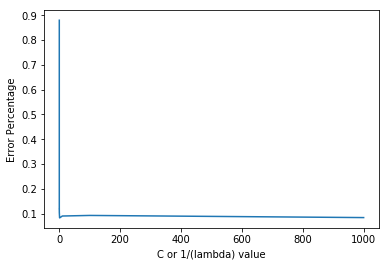

In [43]:
li_of_c_vals = [0.0001,0.001,0.01,0.1,1,10,100,1000]
li_of_errors=[]
for i in li_of_c_vals:
    model = LogisticRegression(C=i, penalty='l1')
    model.fit(x_1,y_1)
    w = model.coef_
    err_val = 1-model.score(x_test,y_test);
    print("C = ",i,", No.of non zero vals: ",np.count_nonzero(w))
    print("Score: ",(1-err_val)*100)
    print("Error: ",(err_val)*100)
    li_of_errors.append(err_val)

plt.plot(li_of_c_vals,li_of_errors)
plt.xlabel('C or 1/(lambda) value')
plt.ylabel('Error Percentage')
plt.show()

#### Observation:<br>
As 'C' val decreases or Lambda val increases Error increases i.e model is underfitted.

# Multi Collinearity Check

#### Adding Noise to the data

In [108]:
from numpy.random import normal
ep=normal(loc=0.0,scale = 0.01)
print(ep)

noisyData = final_tf_idf[0:10000]
# adding noise to non zero elements.
noisyData[noisyData!=0]+=ep;


-7.468860561221003e-05


In [109]:
x = noisyData


# this is only Score/rating  of data

y = final_scores[0:10000]


x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

x_1 = convToNpArray(x_1)
x_test = convToNpArray(x_test)
y_1 = convToNpArray(y_1)
y_test = convToNpArray(y_test)

In [110]:
tuned_parameters = [{'C':[10**-2,10**0,10,10**2,10**4]}]

model = GridSearchCV(LogisticRegression(class_weight='balanced',penalty='l2'),tuned_parameters,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)

print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Score:  0.9577256784197894


In [111]:
clf = LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
clf.fit(x_1,y_1)

w_1 = clf.coef_

#### Data without Noise

In [112]:
x = final_tf_idf[0:10000]


# this is only Score/rating  of data

y = final_scores[0:10000]


x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

x_1 = convToNpArray(x_1)
x_test = convToNpArray(x_test)
y_1 = convToNpArray(y_1)
y_test = convToNpArray(y_test)

In [113]:
tuned_parameters = [{'C':[10**-2,10**0,10,10**2,10**4]}]

model = GridSearchCV(LogisticRegression(class_weight='balanced',penalty='l2'),tuned_parameters,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)

print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Score:  0.9577256784197894


In [114]:
clf = LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
clf.fit(x_1,y_1)

w = clf.coef_

##### Difference between W's(without noise,with noise)

In [115]:
import numpy
#calculating euclidean distance between w and origin, w1 and origin
d_w = numpy.linalg.norm(w[0]-np.zeros(len(w[0])))
d_w1 = numpy.linalg.norm(w_1[0]-np.zeros(len(w_1[0])))

# calculating difference percentage of w,w1 if its more than 30% then they are Multi Collinear
# if its less than 30% not Multi Collinear then we can Use 'w' to get imp features,
# if val of 'wj' is zero its considered as not imp feature or else it imp feature.

diffPercentage=(abs(d_w-d_w1)/d_w)*100
print(diffPercentage)

0.033024648368667066


##### Observation:<br>
As there is no much difference(its less than 30%) after adding noise i.e after perturbation they are not Multi Collinear so we can directly calculate Important Features from 'Wj' if 'Wj' is 0 its not important else its important feature.

## Important Features

In [116]:

def getImpFeatures(vectorizer,w_vec,top_n_features):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(w_vec[0], feature_names))
    print("These are the top 20 important Features Which are most widely used in Positive and Negative Reviews:")
    pos_features = coefs_with_fns[len(feature_names)-top_n_features:len(feature_names)];
    neg_features = coefs_with_fns[0:top_n_features];
    print("\n")
    print("Positive: \t\t\t\t Negative:")
    print("\n")
    for i in range(20):
        print(pos_features[i],"\t\t",neg_features[i])

In [117]:
getImpFeatures(tf_idf_vect,w,20)

These are the top 20 important Features Which are most widely used in Positive and Negative Reviews:


Positive: 				 Negative:


(3.67269840222691, 'this is') 		 (-11.022854495425578, 'not')
(3.830396378404382, 'not too') 		 (-5.919702871446887, 'bad')
(3.8471012895105616, 'is the') 		 (-5.203579659848787, 'was')
(3.8937270060700473, 've') 		 (-4.82529152939797, 'horrible')
(3.906414952561781, 'well') 		 (-4.7611614606687755, 'bland')
(3.9764711662140724, 'wonderful') 		 (-4.633196132031222, 'not worth')
(3.9996887872215345, 'my') 		 (-4.536424119124524, 'awful')
(4.098975896733789, 'you') 		 (-4.454289620730527, 'worst')
(4.183771427232313, 'are') 		 (-4.453348340689143, 'maybe')
(4.2302564482631775, 'perfect') 		 (-4.265050192227308, 'at all')
(4.230877349078375, 'and') 		 (-4.19376677640029, 'return')
(4.274160608860285, 'use') 		 (-4.1467478388618195, 'were')
(4.579999278463121, 'good') 		 (-4.096109095784286, 'instead')
(4.612639553658168, 'excellent') 		 (-4.079439265526672, 'ok

## Summary:<br>
Performed Logistic Regression on Amazon Food Reviews, Used GridSearchCv and RandomSearchCv Observed that RandomSearchCV was fast, Used 2 types of Regularizations L2 and L1, Performed Multi Coliinearity Check and Observed that there is no much difference before and after adding Noise to the data so it can be said that Features are not multi collinear i.e Independent, so used 'W' to get the top 20 important features.<br>

The Positive and Negative Features which we obtained are Perfect when compared to other technique like classifier.coef_ .

<table border="1">
    <tr>
        <th>Regularization</th>
        <th>CV</th>
        <th>Best HyperParameter(C)</th>
        <th>Accuracy</th>
    </tr>
    <tr>
        <td>L2</td>
        <td>GridSearch CV</td>
        <td>10</td>
        <td>95.2%</td>
    </tr>
    <tr>
        <td>L1</td>
        <td>GridSearchCV</td>
        <td>1000</td>
        <td>95.8%</td>
    </tr>
    <tr>
        <td>L2</td>
        <td>RandomSearch CV</td>
        <td>31.67</td>
        <td>95.09%</td>
    </tr>
    <tr>
        <td>L1</td>
        <td>RandomSearch CV</td>
        <td>196.08</td>
        <td>94.5%</td>
    </tr>
</table>